In [1]:
%%capture
!pip install sunpy==4.1.0
!pip install zeep
!pip install drms
!pip install Glymur

**SunPy is an open-source Python library for Solar Physics data analysis. It provides the tools to access and analyze various forms of solar data. SunPy is designed to be simple and easy to use but powerful enough to handle the complex tasks involved in solar data analysis.**

In [2]:
import sunpy.map
from sunpy.database.tables import display_entries
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.database import Database
from sunpy.io.file_tools import read_file
import sunpy.timeseries as ts
from sunpy.time import TimeRange
import sunpy.data.sample as sample_data
from sunpy.net.helioviewer import HelioviewerClient

In [3]:
import glymur

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import astropy.units as u
from astropy.utils.exceptions import AstropyWarning
from astropy.time import Time,TimeDelta
from IPython.display import Image
import warnings
%matplotlib inline
plt.style.use("dark_background")
warnings.simplefilter("ignore",category=AstropyWarning)

# Helioviewer Application

## Client

In [5]:
%%capture
client = HelioviewerClient()

        Use hvpy - https://hvpy.readthedocs.io/en/stable instead.


In [6]:
client.data_sources

OrderedDict([(('SOHO', 'EIT', None, '171'), 0),
             (('SOHO', 'EIT', None, '195'), 1),
             (('SOHO', 'EIT', None, '284'), 2),
             (('SOHO', 'EIT', None, '304'), 3),
             (('SOHO', 'LASCO', 'C2', 'white-light'), 4),
             (('SOHO', 'LASCO', 'C3', 'white-light'), 5),
             (('SOHO', 'MDI', None, 'magnetogram'), 6),
             (('SOHO', 'MDI', None, 'continuum'), 7),
             (('SDO', 'AIA', None, '94'), 8),
             (('SDO', 'AIA', None, '131'), 9),
             (('SDO', 'AIA', None, '171'), 10),
             (('SDO', 'AIA', None, '193'), 11),
             (('SDO', 'AIA', None, '211'), 12),
             (('SDO', 'AIA', None, '304'), 13),
             (('SDO', 'AIA', None, '335'), 14),
             (('SDO', 'AIA', None, '1600'), 15),
             (('SDO', 'AIA', None, '1700'), 16),
             (('SDO', 'AIA', None, '4500'), 17),
             (('SDO', 'HMI', None, 'continuum'), 18),
             (('SDO', 'HMI', None, 'magnetogram'

- Observatory Types Supported by SunPy:

  * **SDO (Solar Dynamics Observatory)**: A NASA mission that has been observing the Sun since 2010.
  * **SOHO (Solar and Heliospheric Observatory)**: A joint ESA-NASA space-based observatory that has been operating since 1995.
  * **Hinode**: A Japanese mission in collaboration with NASA and the UK Space Agency, it has various instruments on board designed to study the Sun's magnetic field.
  * **RHESSI (Reuven Ramaty High Energy Solar Spectroscopic Imager)**: A NASA solar satellite that observed the Sun in high-energy X-rays and gamma rays.
  * **GOES (Geostationary Operational Environmental Satellites)**: These satellites provide data on solar activity and are used for weather forecasting and monitoring.
  * **Proba-2**: A small solar observation satellite developed by the European Space Agency.

## SOHO

In [77]:
date = "2023/01/06"
satellite = "SOHO"
instrument = "EIT"
measurement = "304"

In [78]:
sunImageBaseSOHO = client.download_jp2(date,observatory=satellite,instrument=instrument,measurement=measurement,overwrite=False)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2023_01_06__01_19_48_035__SOHO_EIT_EIT_304.jp2:   0%|          | 0.00/68.8k [00:00<?, ?B/s]

### Information

In [79]:
SOHO = sunpy.map.Map(sunImageBaseSOHO)

Exception ignored in: <function BaseEventLoop.__del__ at 0x79b536f24940>
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/base_events.py", line 690, in __del__
    self.close()
  File "/usr/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter


<sunpy.map.sources.soho.EITMap object at 0x79b4bceed480>
SunPy Map
---------
Observatory:		 SOHO
Instrument:		 EIT
Detector:		 EIT
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2023-01-06 01:19:48
Exposure Time:		 32.598 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [2.63 2.63] arcsec / pix
Reference Pixel:	 [511.57 520.48] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
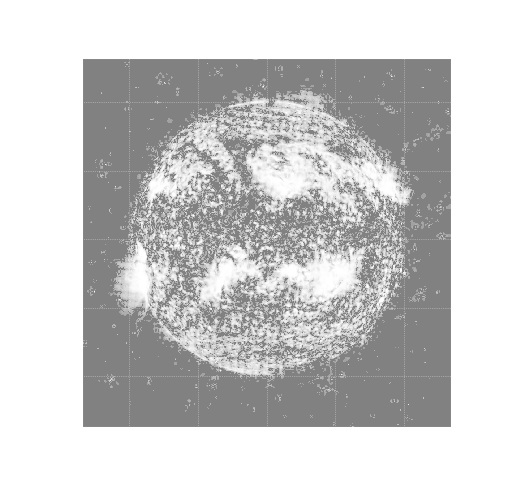
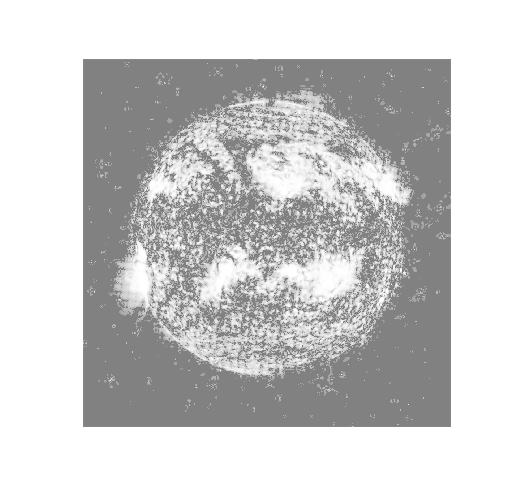
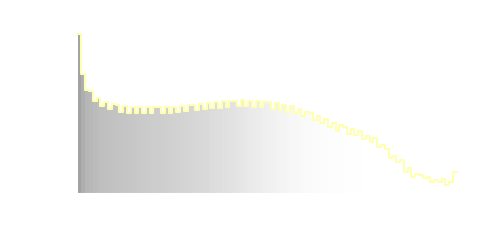
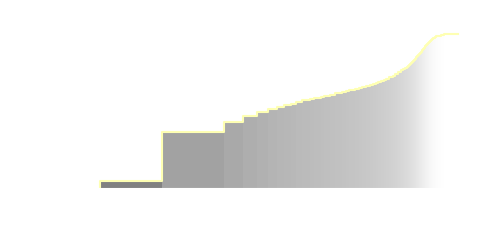

In [80]:
SOHO

In [82]:
SOHO.quantity

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards.


<Quantity [[1., 1., 1., ..., 0., 0., 0.],
           [1., 1., 1., ..., 0., 0., 0.],
           [1., 1., 1., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]>

### Image

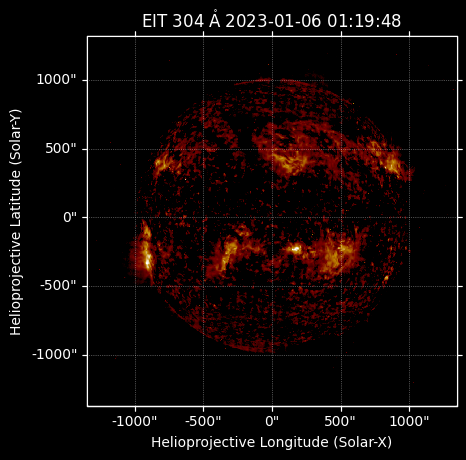

In [83]:
SOHO.plot()

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards.


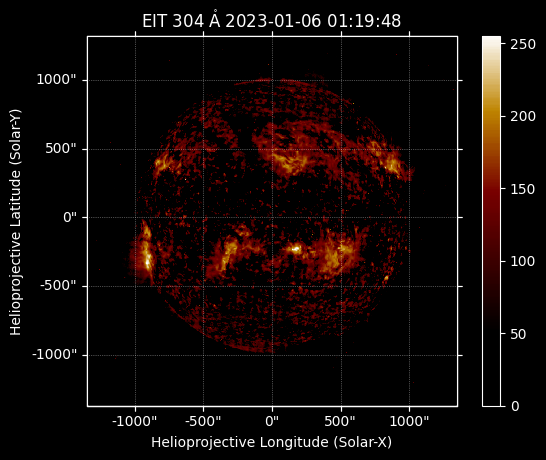

In [84]:
SOHO.peek()

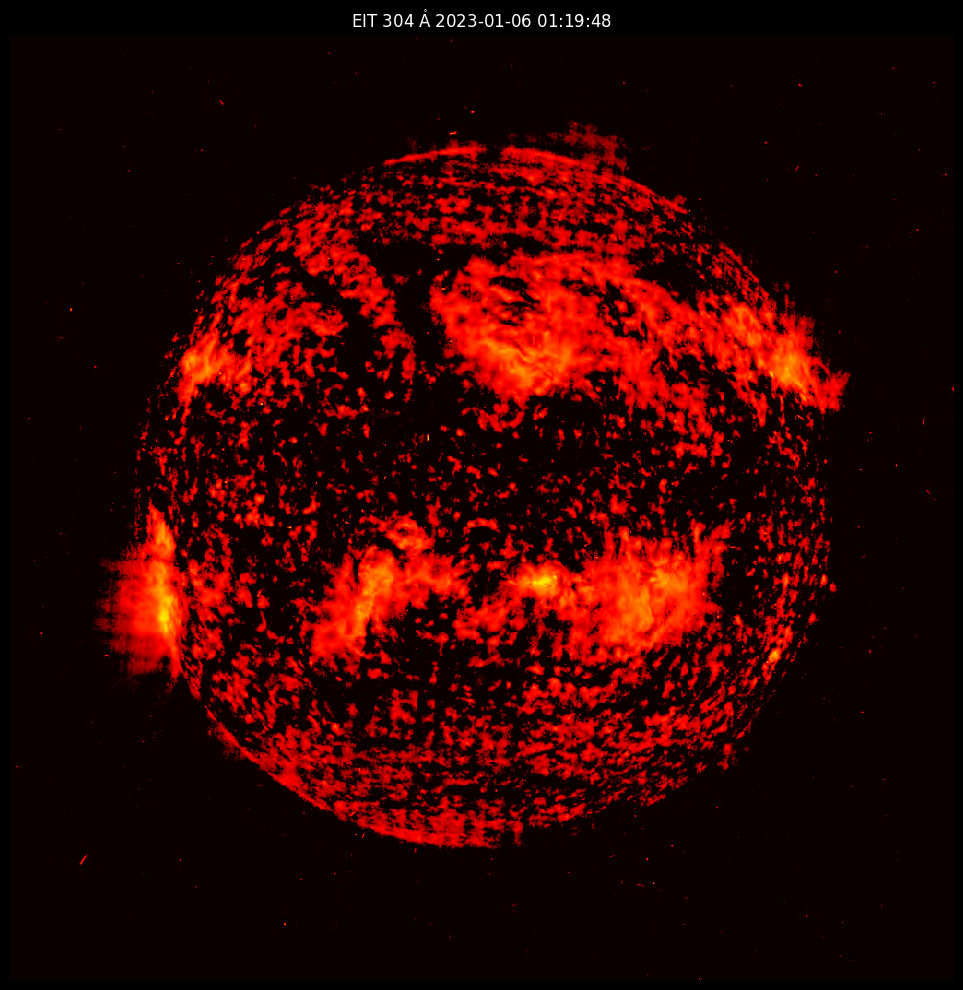

In [85]:
figure = plt.figure(figsize=(10,10))
axs = plt.subplot(111,projection=SOHO)
axs.set_axis_off()
cmap = plt.get_cmap("hot")
SOHO.plot(cmap=cmap,annotate=True)
plt.clim(0,360)
plt.tight_layout()
plt.show()

## HMI

### Download - HMI Example

In [7]:
# in the format YYYY/MM/DD
date = "2023/01/05"
satellite = "SDO"
instrument = "HMI"
measurement = "continuum"

In [8]:
sunImageBaseHMI = client.download_jp2(date,observatory=satellite,instrument=instrument,measurement=measurement,overwrite=False)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2023_01_05__00_00_22_100__SDO_HMI_HMI_continuum.jp2:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

### Information - HMI Example

In [9]:
HMI = sunpy.map.Map(sunImageBaseHMI)

<sunpy.map.sources.sdo.HMIMap object at 0x79b4ce0c0c40>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0
Observation Date:	 2023-01-05 00:00:22
Exposure Time:		 Unknown
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.60000002 0.60000002] arcsec / pix
Reference Pixel:	 [2047.5 2047.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
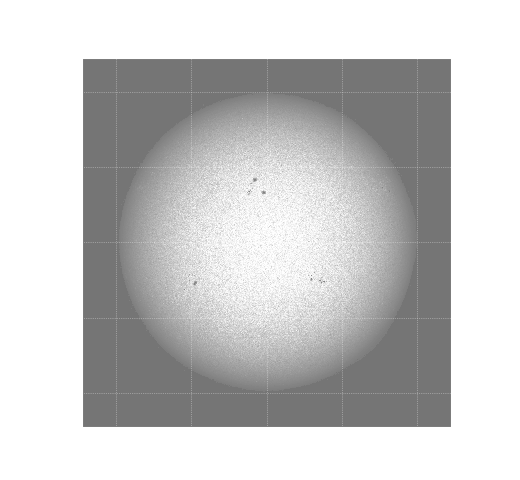
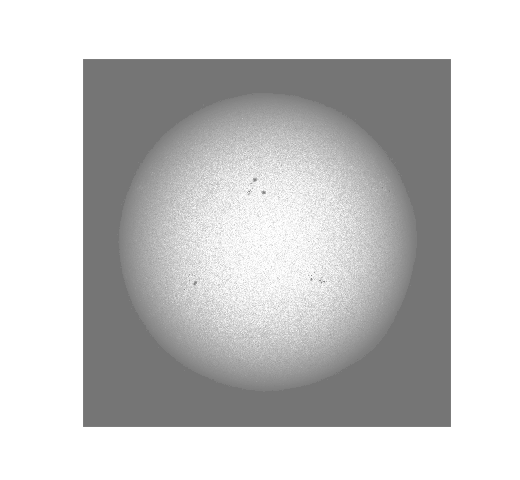
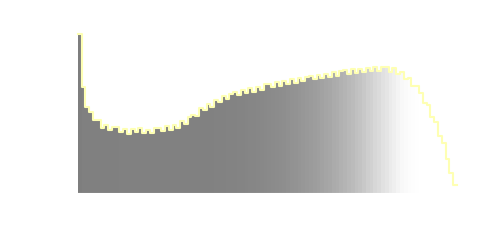
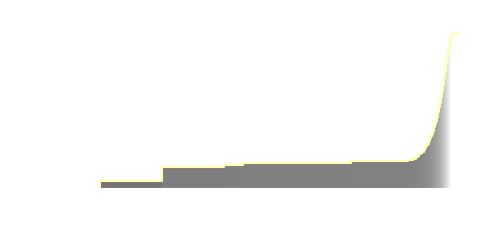

In [81]:
HMI

In [10]:
HMI.coordinate_system

SpatialPair(axis1='HPLN-TAN', axis2='HPLT-TAN')

In [11]:
HMI.latex_name

'HMI continuum 2023-01-05 00:00:22'

In [12]:
HMI.name

'HMI continuum 2023-01-05 00:00:22'

In [13]:
HMI.detector

'HMI'

In [14]:
HMI.wavelength # nm

<Quantity 6173.>

In [15]:
HMI.dtype

dtype('uint8')

In [16]:
print(f"Carrington Latitude: {HMI.carrington_latitude}")
print(f"Carrington Longitude: {HMI.carrington_longitude}")

Exception ignored in: <function BaseEventLoop.__del__ at 0x79b536f24940>
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/base_events.py", line 690, in __del__
    self.close()
  File "/usr/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter


Carrington Latitude: -3.4378504999999993 deg
Carrington Longitude: 312.27249 deg


In [17]:
print(f"Heliographic Latitude: {HMI.heliographic_latitude}")
print(f"Heliographic Longitude: {HMI.heliographic_longitude}")

Heliographic Latitude: -3.4378504999999993 deg
Heliographic Longitude: -0.016976034800222806 deg


### Image - HMI Example

In [18]:
HMI.min() # Image min value

0

In [19]:
HMI.max() # Image max value

255

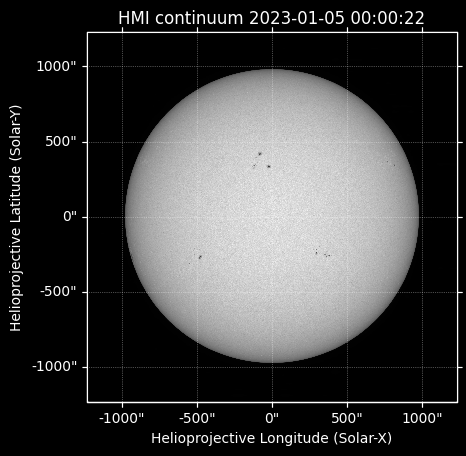

In [20]:
HMI.plot()

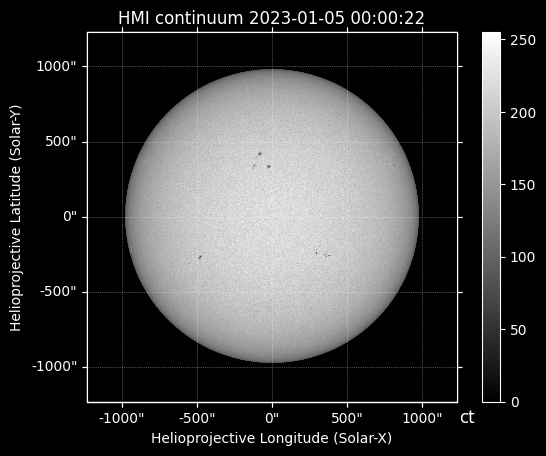

In [21]:
HMI.peek()

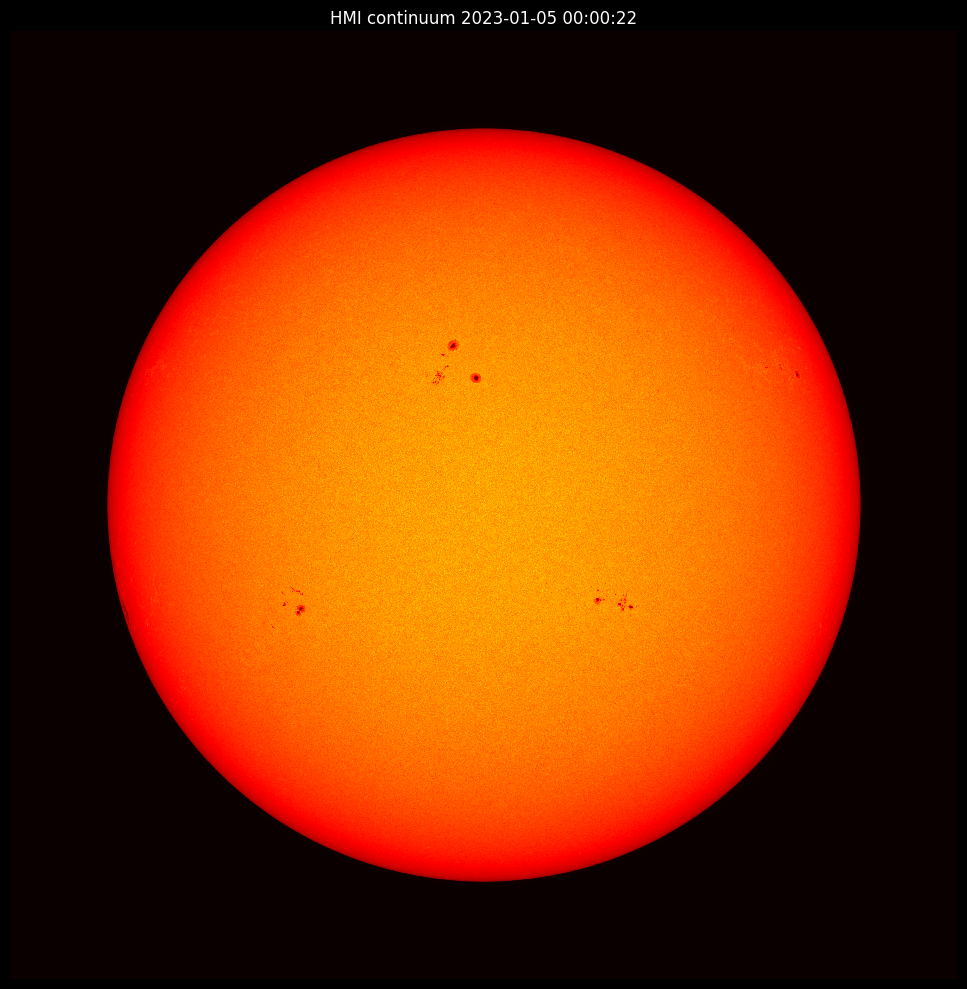

In [22]:
figure = plt.figure(figsize=(10,10))
axs = plt.subplot(111,projection=HMI)
axs.set_axis_off()
cmap = plt.get_cmap("hot")
HMI.plot(cmap=cmap,annotate=True)
plt.clim(0,360)
plt.tight_layout()
plt.show()

# SQLITE Creating & Searching Example

In [91]:
sqlPathNew = "/content/sunpydataNew.sqlite"
databaseNew = Database(f"sqlite:///{sqlPathNew}")
databaseNew.default_waveunit = "angstrom"

In [95]:
timeInterval = TimeRange("2023-01-04 00:00","2023-01-05 00:00")

In [96]:
result = Fido.search(a.Time(timeInterval),a.Instrument("EIT"))

In [97]:
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x79b4a40dd630>
Results from 1 Provider:

8 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 16.867 Mbyte

       Start Time               End Time        Source ... Extent Type   Size 
                                                       ...              Mibyte
----------------------- ----------------------- ------ ... ----------- -------
2023-01-04 01:00:14.000 2023-01-04 01:00:26.000   SOHO ...    FULLDISK 2.01074
2023-01-04 01:06:11.000 2023-01-04 01:08:13.000   SOHO ...    FULLDISK 2.01074
2023-01-04 01:13:54.000 2023-01-04 01:14:06.000   SOHO ...    FULLDISK 2.01074
2023-01-04 01:19:48.000 2023-01-04 01:20:20.000   SOHO ...    FULLDISK 2.01074
2023-01-04 13:00:13.000 2023-01-04 13:00:26.000   SOHO ...    FULLDISK 2.01074
2023-01-04 13:06:10.000 2023-01-04 13:08:12.000   SOHO ...    FULLDISK 2.01074
2023-01-04 13:13:53.000 2023-01-04 13:14:05.000   SOHO ...    FULLDISK 2.01074
2023-01-04 13:19:47.000 2023-01-04 13:20:19.000   SOHO ...    FULLDISK 2.01074

In [98]:
downloadFunction = Fido.fetch(result,path="./content/creatingSearching")

Files Downloaded:   0%|          | 0/8 [00:00<?, ?file/s]

In [99]:
databaseNew.add_from_dir("./content/creatingSearching",ignore_already_added=True,time_string_parse_format="%d/%m/%Y")

In [100]:
for entry in databaseNew:
  print(entry)

DatabaseEntry(id=1, observation_time_start=datetime.datetime(2023, 1, 4, 1, 0, 14, 97000), instrument='EIT', wavemin=17.1, wavemax=17.1, path='./content/creatingSearching/efz20230104.010014', fits_header_entries=[FitsHeaderEntry(id=1, key='SIMPLE', value=True), FitsHeaderEntry(id=2, key='BITPIX', value=16), FitsHeaderEntry(id=3, key='NAXIS', value=2), FitsHeaderEntry(id=4, key='NAXIS1', value=1024), FitsHeaderEntry(id=5, key='NAXIS2', value=1024), FitsHeaderEntry(id=6, key='', value='\n\n\n\n                       / 284 = Fe XV, 304 = He II\n\n\n\n\n\n\n\n'), FitsHeaderEntry(id=7, key='DATE', value='2023-01-04'), FitsHeaderEntry(id=8, key='TIME-OBS', value='01:00:14'), FitsHeaderEntry(id=9, key='DATE-OBS', value='2023-01-04T01:00:14.097'), FitsHeaderEntry(id=10, key='ORIGIN', value='Rocket Science'), FitsHeaderEntry(id=11, key='DATASRC', value='LZ file'), FitsHeaderEntry(id=12, key='TELESCOP', value='SOHO'), FitsHeaderEntry(id=13, key='INSTRUME', value='EIT'), FitsHeaderEntry(id=14, ke

In [101]:
# deleting bad entries
for entry in databaseNew:
  if (entry.observation_time_start is None) and (entry.observation_time_end is None):
    databaseNew.remove(entry)

In [102]:
# wavelengths in nm
print(display_entries(databaseNew,["id","observation_time_start","observation_time_end","wavemin","wavemax","instrument"]))

 id observation_time_start ...      wavemax       instrument
--- ---------------------- ... ------------------ ----------
  1    2023-01-04 01:00:14 ...               17.1        EIT
  2    2023-01-04 01:06:11 ... 28.400000000000002        EIT
  3    2023-01-04 01:13:54 ...               19.5        EIT
  4    2023-01-04 01:19:48 ... 30.400000000000002        EIT
  5    2023-01-04 13:00:13 ...               17.1        EIT
  6    2023-01-04 13:06:10 ... 28.400000000000002        EIT
  7    2023-01-04 13:13:53 ...               19.5        EIT
  8    2023-01-04 13:19:47 ... 30.400000000000002        EIT
  9    2023-01-05 01:00:14 ...               17.1        EIT
 10    2023-01-05 01:06:11 ... 28.400000000000002        EIT
...                    ... ...                ...        ...
489    2023-03-09 01:00:14 ...               17.1        EIT
490    2023-03-09 01:06:11 ... 28.400000000000002        EIT
491    2023-03-09 01:13:54 ...               19.5        EIT
492    2023-03-09 01:19:

In [103]:
plotDictionary = {}

In [104]:
EIT = databaseNew.search(a.Wavelength(.1*u.nm,60.0*u.nm))

In [106]:
for observation in EIT:
  plotDictionary[int(observation.wavemin*10)] = [observation.path,"eit"+str(int(observation.wavemin*10))]

In [107]:
plotDictionary

{171: ['./content/creatingSearching/efz20230310.010013', 'eit171'],
 284: ['./content/creatingSearching/efz20230310.010610', 'eit284'],
 195: ['./content/creatingSearching/efz20230310.011353', 'eit195'],
 304: ['./content/creatingSearching/efz20230309.131949', 'eit304']}

In [108]:
plotDictionary.keys()

dict_keys([171, 284, 195, 304])

In [109]:
for image in sorted(plotDictionary.keys()):
  print(plotDictionary[image][0])

./content/creatingSearching/efz20230310.010013
./content/creatingSearching/efz20230310.011353
./content/creatingSearching/efz20230310.010610
./content/creatingSearching/efz20230309.131949


In [111]:
for image in sorted(plotDictionary.keys()):
  print(plotDictionary[image][1])

eit171
eit195
eit284
eit304


# SQLITE Reading Example

In [23]:
from google.colab import drive
drive.mount("/content/driveFiles")

Mounted at /content/driveFiles


for real data: https://drive.google.com/file/d/1ieXBSWNx3lhdg8Ppe4_czYA6jlegc5Wz/view?usp=sharing

In [24]:
sqlPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/sqlite_data/solar_image/sunpydata.sqlite"

## Read

In [25]:
database = Database(f"sqlite:///{sqlPath}")

In [26]:
database.default_waveunit = "angstrom"

## Search & Download

In [27]:
# takes a few seconds
result = Fido.search(a.Time("2023/01/08 12:00","2023/01/08 12:01"),
                     a.Instrument('aia'),
                     a.Sample(2*u.minute),
                     a.Wavelength(94*u.angstrom)
                     |a.Wavelength(131*u.angstrom)
                     |a.Wavelength(171*u.angstrom)
                     |a.Wavelength(193*u.angstrom)
                     |a.Wavelength(211*u.angstrom)
                     |a.Wavelength(304*u.angstrom)
                     |a.Wavelength(335*u.angstrom)
                     |a.Wavelength(1600*u.angstrom)
                     |a.Wavelength(4500*u.angstrom))
print(result)

Results from 9 Providers:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2023-01-08 12:00:11.000 2023-01-08 12:00:12.000    SDO ...    FULLDISK 64.64844

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2023-01-08 12:00:06.000 2023-01-08 12:00:07.000    SDO ...    FULLDISK 64.64844

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789

In [28]:
# downloading result - FITS FILE
downloadFunction = Fido.fetch(result,path="./content/")

Files Downloaded:   0%|          | 0/9 [00:00<?, ?file/s]

aia_lev1_193a_2023_01_08t12_00_05_63z_image_lev1.fits:   0%|          | 0.00/11.8M [00:00<?, ?B/s]

aia_lev1_131a_2023_01_08t12_00_06_65z_image_lev1.fits:   0%|          | 0.00/8.59M [00:00<?, ?B/s]

aia_lev1_211a_2023_01_08t12_00_09_62z_image_lev1.fits:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

aia_lev1_171a_2023_01_08t12_00_09_35z_image_lev1.fits:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_08t12_00_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_304a_2023_01_08t12_00_05_13z_image_lev1.fits:   0%|          | 0.00/7.53M [00:00<?, ?B/s]

aia_lev1_335a_2023_01_08t12_00_00_63z_image_lev1.fits:   0%|          | 0.00/7.37M [00:00<?, ?B/s]

aia_lev1_1600a_2023_01_08t12_00_14_13z_image_lev1.fits:   0%|          | 0.00/8.74M [00:00<?, ?B/s]

aia_lev1_4500a_2023_01_08t12_00_05_68z_image_lev1.fits:   0%|          | 0.00/15.1M [00:00<?, ?B/s]

In [29]:
database.add_from_dir("./content/",ignore_already_added=True,time_string_parse_format="%d/%m/%Y")

In [30]:
for entry in database:
  print(entry)

DatabaseEntry(id=1, path='./content/aia_lev1_131a_2023_01_08t12_00_06_65z_image_lev1.fits', fits_header_entries=[FitsHeaderEntry(id=1, key='SIMPLE', value=True), FitsHeaderEntry(id=2, key='BITPIX', value=16), FitsHeaderEntry(id=3, key='NAXIS', value=0), FitsHeaderEntry(id=4, key='EXTEND', value=True), FitsHeaderEntry(id=5, key='COMMENT', value="FITS (Flexible Image Transport System) format is defined in 'Astronomy  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H"), FitsHeaderEntry(id=6, key='HISTORY', value='')])
DatabaseEntry(id=2, observation_time_start=datetime.datetime(2023, 1, 8, 12, 0, 6, 650000), instrument='AIA_1', wavemin=13.100000000000001, wavemax=13.100000000000001, path='./content/aia_lev1_131a_2023_01_08t12_00_06_65z_image_lev1.fits', fits_header_entries=[FitsHeaderEntry(id=7, key='SIMPLE', value=True), FitsHeaderEntry(id=8, key='BITPIX', value=16), FitsHeaderEntry(id=9, key='NAXIS', value=2), FitsHeaderEntry(id=10, key='NAXIS1', value=4096), FitsHea

In [31]:
# deleting bad entries
for entry in database:
  if (entry.observation_time_start is None) and (entry.observation_time_end is None):
    database.remove(entry)

## Data - Check

In [32]:
# wavelengths in nm
print(display_entries(database,["id","observation_time_start","observation_time_end","wavemin","wavemax","instrument"]))

 id observation_time_start ...      wavemax       instrument
--- ---------------------- ... ------------------ ----------
  2    2023-01-08 12:00:06 ... 13.100000000000001      AIA_1
  4    2023-01-08 12:00:14 ...              160.0      AIA_3
  6    2023-01-08 12:00:09 ...               17.1      AIA_3
  8    2023-01-08 12:00:05 ...               19.3      AIA_2
 10    2023-01-08 12:00:09 ...               21.1      AIA_2
 12    2023-01-08 12:00:05 ... 30.400000000000002      AIA_4
 14    2023-01-08 12:00:00 ...               33.5      AIA_1
 16    2023-01-08 12:00:05 ...              450.0      AIA_3
 18    2023-01-08 12:00:11 ...                9.4      AIA_4


## Query Specific Value

In [33]:
# wavelengths between 1-2 nm or 10-20 Angstrom
print(display_entries(database.search(a.Wavelength(1.0*u.nm,2.0*u.nm)),["id","observation_time_start","observation_time_end","wavemin","wavemax","instrument"]))

 id observation_time_start ...      wavemax       instrument
--- ---------------------- ... ------------------ ----------
  8    2023-01-08 12:00:05 ...               19.3      AIA_2
  2    2023-01-08 12:00:06 ... 13.100000000000001      AIA_1
  6    2023-01-08 12:00:09 ...               17.1      AIA_3


## Plot

In [34]:
plotDictionary = {}

In [35]:
AIA = database.search(a.Wavelength(.1*u.nm,60.0*u.nm))

In [36]:
for observation in AIA:
  plotDictionary[int(observation.wavemin*10)] = [observation.path,"sdoaia"+str(int(observation.wavemin*10))]

In [37]:
plotDictionary

{335: ['./content/aia_lev1_335a_2023_01_08t12_00_00_63z_image_lev1.fits',
  'sdoaia335'],
 304: ['./content/aia_lev1_304a_2023_01_08t12_00_05_13z_image_lev1.fits',
  'sdoaia304'],
 193: ['./content/aia_lev1_193a_2023_01_08t12_00_05_63z_image_lev1.fits',
  'sdoaia193'],
 4500: ['./content/aia_lev1_4500a_2023_01_08t12_00_05_68z_image_lev1.fits',
  'sdoaia4500'],
 131: ['./content/aia_lev1_131a_2023_01_08t12_00_06_65z_image_lev1.fits',
  'sdoaia131'],
 171: ['./content/aia_lev1_171a_2023_01_08t12_00_09_35z_image_lev1.fits',
  'sdoaia171'],
 211: ['./content/aia_lev1_211a_2023_01_08t12_00_09_62z_image_lev1.fits',
  'sdoaia211'],
 94: ['./content/aia_lev1_94a_2023_01_08t12_00_11_12z_image_lev1.fits',
  'sdoaia94'],
 1600: ['./content/aia_lev1_1600a_2023_01_08t12_00_14_13z_image_lev1.fits',
  'sdoaia1600']}

In [38]:
plotDictionary.keys()

dict_keys([335, 304, 193, 4500, 131, 171, 211, 94, 1600])

In [39]:
for image in sorted(plotDictionary.keys()):
  print(plotDictionary[image][0])

./content/aia_lev1_94a_2023_01_08t12_00_11_12z_image_lev1.fits
./content/aia_lev1_131a_2023_01_08t12_00_06_65z_image_lev1.fits
./content/aia_lev1_171a_2023_01_08t12_00_09_35z_image_lev1.fits
./content/aia_lev1_193a_2023_01_08t12_00_05_63z_image_lev1.fits
./content/aia_lev1_211a_2023_01_08t12_00_09_62z_image_lev1.fits
./content/aia_lev1_304a_2023_01_08t12_00_05_13z_image_lev1.fits
./content/aia_lev1_335a_2023_01_08t12_00_00_63z_image_lev1.fits
./content/aia_lev1_1600a_2023_01_08t12_00_14_13z_image_lev1.fits
./content/aia_lev1_4500a_2023_01_08t12_00_05_68z_image_lev1.fits


In [40]:
for image in sorted(plotDictionary.keys()):
  print(plotDictionary[image][1])

sdoaia94
sdoaia131
sdoaia171
sdoaia193
sdoaia211
sdoaia304
sdoaia335
sdoaia1600
sdoaia4500


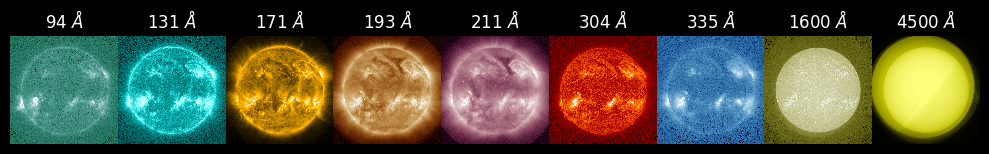

In [41]:
figure = plt.figure(figsize=(10,10))
count = 0
grid = figure.add_gridspec(1,len(AIA),wspace=0.00,hspace=0.0)
for image in sorted(plotDictionary.keys()):
  mapSun = sunpy.map.Map(plotDictionary[image][0])
  ax1 = plt.subplot(grid[count],projection=mapSun)
  ax1.set_title(str(image)+r" $\AA$",pad=6)
  cmap = plt.get_cmap(plotDictionary[image][1])
  mapSun.plot(
      axes=ax1,
      cmap=cmap,
      annotate=False,
      clip_interval=(0.1,99.9)*u.percent
  )
  ax1.set_axis_off()
  count += 1
plt.tight_layout()
plt.show()

# Solar Corona Layer - LASCO

for real data: https://drive.google.com/file/d/1q8YxIeX3XmFswhb6zrrZuuEGYJ7U1T5c/view?usp=sharing

In [42]:
lascoDataPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/lasco_data/32048310.fts"

In [43]:
# LASCO C3 detector data taken on the 2000/02/27 between 7:42 and 7:43 am
data,header = read_file(lascoDataPath)[0]

In [44]:
data

array([[370, 378, 381, ..., 379, 382, 380],
       [371, 373, 377, ..., 375, 376, 375],
       [370, 376, 376, ..., 375, 373, 375],
       ...,
       [371, 378, 375, ..., 376, 375, 376],
       [390, 395, 394, ..., 394, 393, 393],
       [408, 420, 424, ..., 427, 423, 421]], dtype=int16)

In [45]:
header

FileHeader([('SIMPLE', True),
            ('BITPIX', 16),
            ('NAXIS', 2),
            ('NAXIS1', 1024),
            ('NAXIS2', 1024),
            ('FILENAME', '32048310.fts'),
            ('FILEORIG', '000227_074324.img'),
            ('DATE', '2000/05/26 03:56:44.796'),
            ('DATE-OBS', '2000/02/27'),
            ('TIME-OBS', '07:42:05.810'),
            ('P1COL', 20),
            ('P1ROW', 1),
            ('P2COL', 1043),
            ('P2ROW', 1024),
            ('VERSION', 2),
            ('EXPTIME', 19.0986),
            ('EXP0', 17.0),
            ('EXPCMD', 17.0),
            ('EXP1', 1.88379),
            ('EXP2', 2.1167),
            ('EXP3', 2.09863),
            ('TELESCOP', 'SOHO'),
            ('INSTRUME', 'LASCO'),
            ('DETECTOR', 'C3'),
            ('READPORT', 'C'),
            ('SUMROW', 0),
            ('SUMCOL', 0),
            ('LEBXSUM', 1),
            ('LEBYSUM', 1),
            ('SHUTTR', 0),
            ('LAMP', 0),
            ('FILTE

In [46]:
header["CUNIT1"] = "arcsec"
header["CUNIT2"] = "arcsec"

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs
 [sunpy.map.mapbase]
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


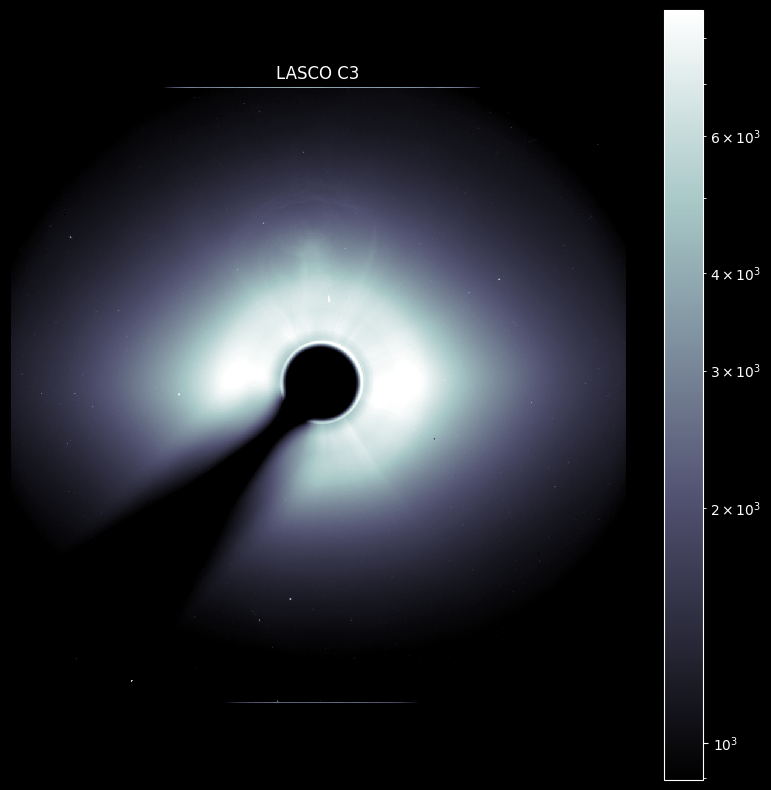

In [47]:
coronaMap = sunpy.map.Map(data,header)
figure = plt.figure(4,figsize=(8,8))
axsSOHO = plt.subplot(111,projection=coronaMap)
axsSOHO.set_title("LASCO C3")
lasco = coronaMap.plot(annotate=False,norm=colors.LogNorm(),clip_interval=(25.0,99.5)*u.percent)
axsSOHO.set_axis_off()
plt.colorbar()
plt.tight_layout()
plt.show()

# Flares & Sunspots

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20110607_064555_0193_cutout.fits:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

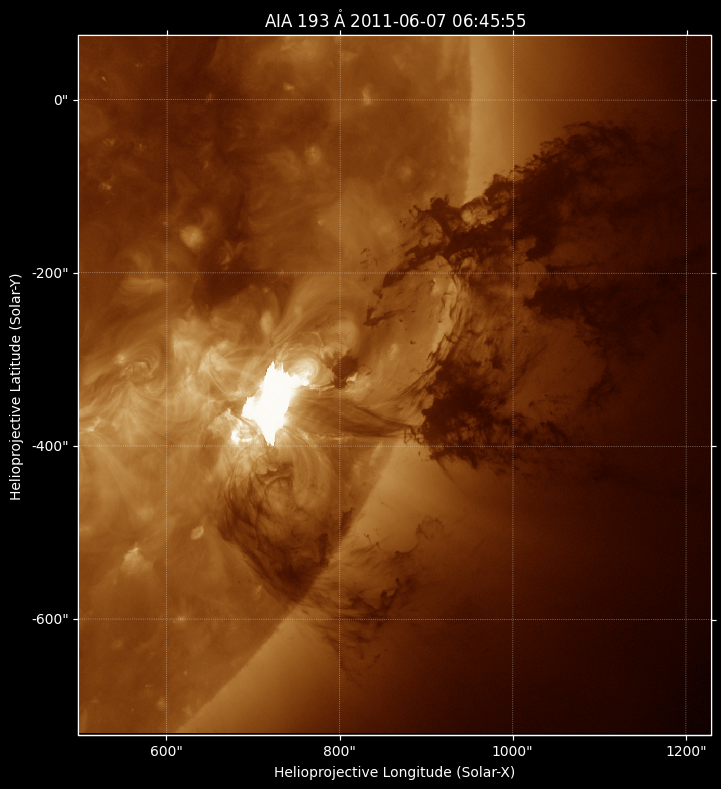

In [48]:
AIAcutOut = sunpy.map.Map(sample_data.AIA_193_CUTOUT03_IMAGE)
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(111,projection=AIAcutOut)
AIAcutOut.plot()
plt.tight_layout()
plt.show()

## Time Range

In [49]:
timeInterval = TimeRange("1980-06-01 00:00",Time.now())

In [50]:
timeInterval

    Start: 1980-06-01 00:00:00
    End:   2024-01-10 17:20:37
    Center:2002-03-22 08:40:14
    Duration:15928.72286296353 days or
           382289.34871112474 hours or
           22937360.922667485 minutes or
           1376241655.360049 seconds

In [67]:
result = Fido.search(a.Time(timeInterval),a.Instrument("noaa-indices"))
noaaIndices = Fido.fetch(result)
result = Fido.search(
    a.Time(timeInterval.end,timeInterval.end+TimeDelta(4*u.year)),
    a.Instrument("noaa-predict")
)
noaaPredict = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

predicted-solar-cycle.json:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

In [68]:
noaaIndices

['/root/sunpy/data/observed-solar-cycle-indices.json']

In [69]:
print(f"Data Path: {noaaPredict[0]}")

Data Path: /root/sunpy/data/predicted-solar-cycle.json


In [70]:
%%capture
noaa = ts.TimeSeries(noaaIndices,source="noaaindices").truncate(timeInterval)
noaaPredict = ts.TimeSeries(noaaPredict,source="noaapredictindices")

In [71]:
noaa.quantity

<bound method GenericTimeSeries.quantity of <sunpy.timeseries.sources.noaa.NOAAIndicesTimeSeries object at 0x79b4a3105b40>
SunPy TimeSeries
----------------
Observatory:		 Unknown
Instrument:		 <a href=https://www.swpc.noaa.gov/products-and-data target="_blank">Unknown</a>
Channel(s):		 sunspot RI<br>sunspot RI smooth<br>sunspot SWO<br>sunspot SWO smooth<br>radio flux<br>radio flux smooth
Start Date:		 1980-06-01 00:00:00
End Date:		 2023-12-01 00:00:00
Center Date:		 2002-03-01 23:59:56
Resolution:		 2624709.786 s
Samples per Channel:		 523
Data Range(s):		 sunspot RI           2.84E+02<br>sunspot RI smooth    2.17E+02<br>sunspot SWO          2.37E+02<br>sunspot SWO smooth   1.87E+02<br>radio flux           1.17E+02<br>radio flux smooth    9.13E+01
Units:		 dimensionless<br>W / (Hz m2)
            sunspot RI  sunspot RI smooth  sunspot SWO  sunspot SWO smooth  \
1980-06-01       222.7              219.1          NaN                 NaN   
1980-07-01       192.9              216.1     

<sunpy.timeseries.sources.noaa.NOAAIndicesTimeSeries object at 0x79b4a3105b40>
SunPy TimeSeries
----------------
Observatory:		 Unknown
Instrument:		 <a href=https://www.swpc.noaa.gov/products-and-data target="_blank">Unknown</a>
Channel(s):		 sunspot RI<br>sunspot RI smooth<br>sunspot SWO<br>sunspot SWO smooth<br>radio flux<br>radio flux smooth
Start Date:		 1980-06-01 00:00:00
End Date:		 2023-12-01 00:00:00
Center Date:		 2002-03-01 23:59:56
Resolution:		 2624709.786 s
Samples per Channel:		 523
Data Range(s):		 sunspot RI           2.84E+02<br>sunspot RI smooth    2.17E+02<br>sunspot SWO          2.37E+02<br>sunspot SWO smooth   1.87E+02<br>radio flux           1.17E+02<br>radio flux smooth    9.13E+01
Units:		 dimensionless<br>W / (Hz m2)
            sunspot RI  sunspot RI smooth  sunspot SWO  sunspot SWO smooth  \
1980-06-01       222.7              219.1          NaN                 NaN   
1980-07-01       192.9              216.1          NaN                 NaN   
1980-08-01       191.7              212.0          NaN                 NaN   
1980-09-01       219.6              211.5          NaN                 NaN   
1980-10-01       233.3              211.9          NaN                 NaN   
...                ...                ...          ...                 ...   
2023-08-01       114.8                NaN        99.87                 NaN   
2023-09-01       133.6                NaN       129.93                 NaN   
2023-10-01        99.4                NaN        94.94                 NaN   
2023-11-01       105.4                NaN       105.87                 NaN   
2023-12-01       114.2                NaN       113.65                 NaN   

            radio flux  radio flux smooth  
1980-06-01         NaN                NaN  
1980-07-01         NaN                NaN  
1980-08-01         NaN                NaN  
1980-09-01         NaN                NaN  
1980-10-01         NaN                NaN  
...                ...                ...  
2023-08-01      153.92                NaN  
2023-09-01      155.74                NaN  
2023-10-01      141.59                NaN  
2023-11-01      154.36                NaN  
2023-12-01      159.28                NaN  

[523 rows x 6 columns]
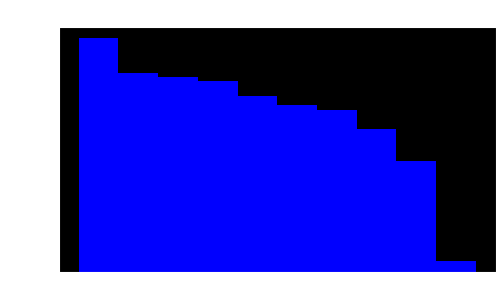
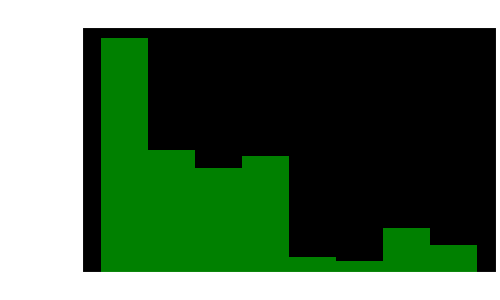
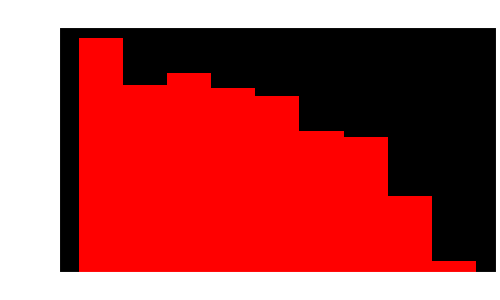
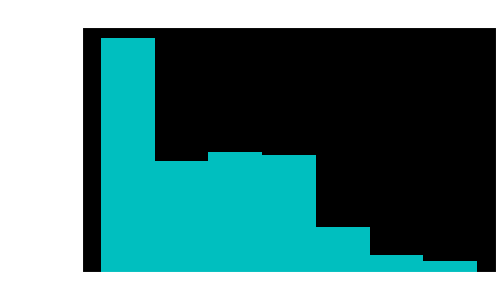
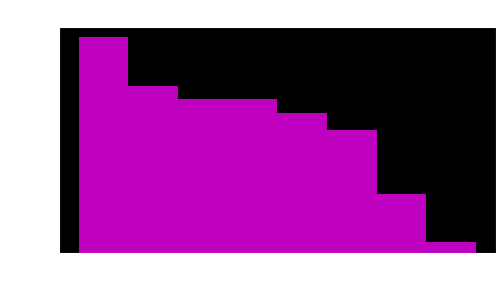
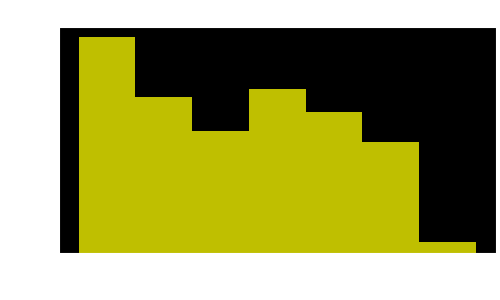
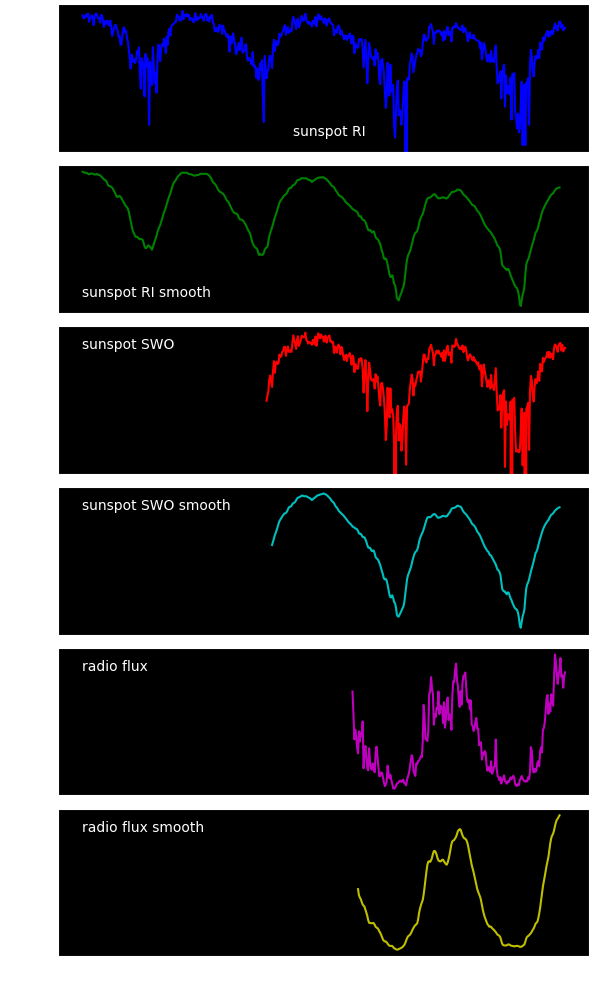
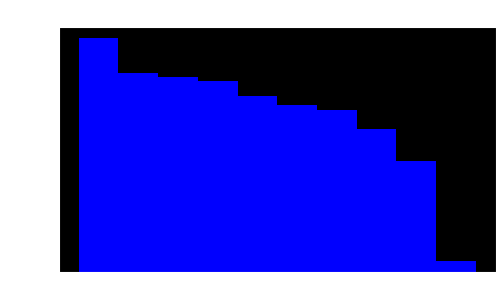

In [72]:
noaa

In [73]:
noaaPredict.quantity

/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


<bound method GenericTimeSeries.quantity of <sunpy.timeseries.sources.noaa.NOAAPredictIndicesTimeSeries object at 0x79b4a317d900>
SunPy TimeSeries
----------------
Observatory:		 Unknown
Instrument:		 <a href=https://www.swpc.noaa.gov/products-and-data target="_blank">Unknown</a>
Channel(s):		 sunspot<br>sunspot high<br>sunspot low<br>radio flux<br>radio flux high<br>radio flux low
Start Date:		 2023-07-01 00:00:00
End Date:		 2040-12-01 00:00:00
Center Date:		 2032-03-16 12:00:00
Resolution:		 2617920.0 s
Samples per Channel:		 210
Data Range(s):		 sunspot           1.23E+02<br>sunspot high      1.16E+02<br>sunspot low       1.22E+02<br>radio flux        8.97E+01<br>radio flux high   1.50E+02<br>radio flux low    8.87E+01
Units:		 dimensionless<br>W / (Hz m2)
            sunspot  sunspot high  sunspot low  radio flux  radio flux high  \
2023-07-01    123.1         124.1        122.1      157.40            158.4   
2023-08-01    120.5         122.5        118.5      152.90            1

/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(f

<sunpy.timeseries.sources.noaa.NOAAPredictIndicesTimeSeries object at 0x79b4a317d900>
SunPy TimeSeries
----------------
Observatory:		 Unknown
Instrument:		 <a href=https://www.swpc.noaa.gov/products-and-data target="_blank">Unknown</a>
Channel(s):		 sunspot<br>sunspot high<br>sunspot low<br>radio flux<br>radio flux high<br>radio flux low
Start Date:		 2023-07-01 00:00:00
End Date:		 2040-12-01 00:00:00
Center Date:		 2032-03-16 12:00:00
Resolution:		 2617920.0 s
Samples per Channel:		 210
Data Range(s):		 sunspot           1.23E+02<br>sunspot high      1.16E+02<br>sunspot low       1.22E+02<br>radio flux        8.97E+01<br>radio flux high   1.50E+02<br>radio flux low    8.87E+01
Units:		 dimensionless<br>W / (Hz m2)
            sunspot  sunspot high  sunspot low  radio flux  radio flux high  \
2023-07-01    123.1         124.1        122.1      157.40            158.4   
2023-08-01    120.5         122.5        118.5      152.90            153.9   
2023-09-01    118.9         121.9        115.9      149.50            151.5   
2023-10-01    118.0         123.0        113.0      147.30            150.3   
2023-11-01    116.8         121.8        111.8      145.20            149.2   
...             ...           ...          ...         ...              ...   
2040-08-01      0.0           9.0          0.0       67.73              8.0   
2040-09-01      0.0           9.0          0.0       67.73              8.0   
2040-10-01      0.0           9.0          0.0       67.73              8.0   
2040-11-01      0.0           9.0          0.0       67.73              8.0   
2040-12-01      0.0           9.0          0.0       67.73              8.0   

            radio flux low  
2023-07-01           156.4  
2023-08-01           151.9  
2023-09-01           147.5  
2023-10-01           144.3  
2023-11-01           141.2  
...                    ...  
2040-08-01            67.7  
2040-09-01            67.7  
2040-10-01            67.7  
2040-11-01            67.7  
2040-12-01            67.7  

[210 rows x 6 columns]
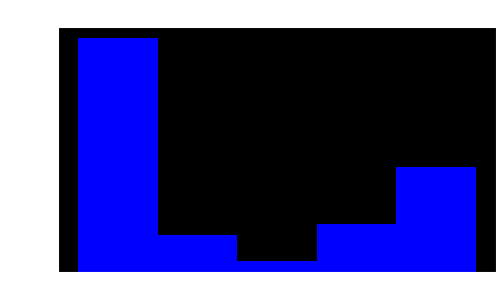
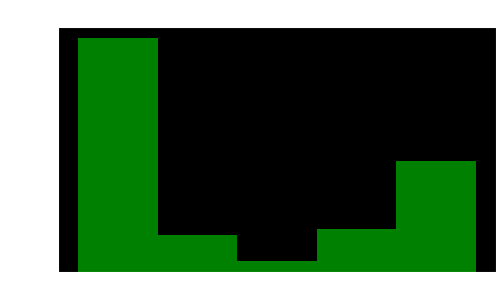
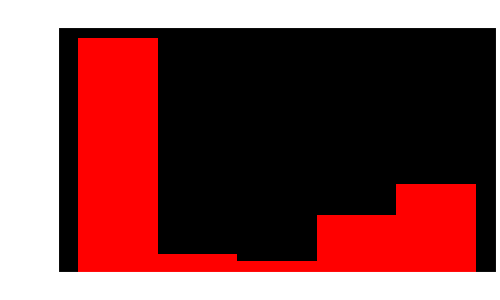
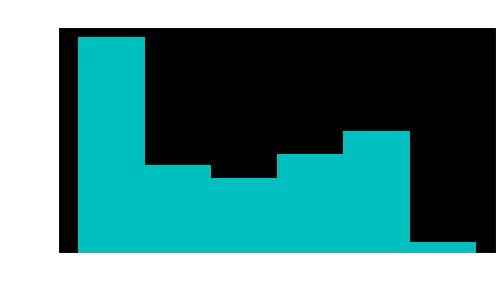
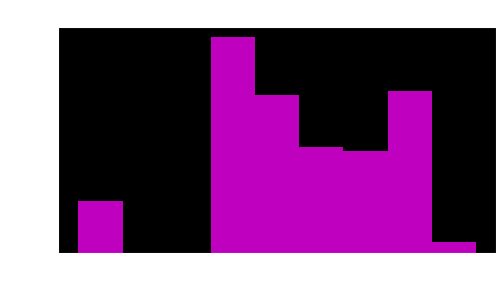
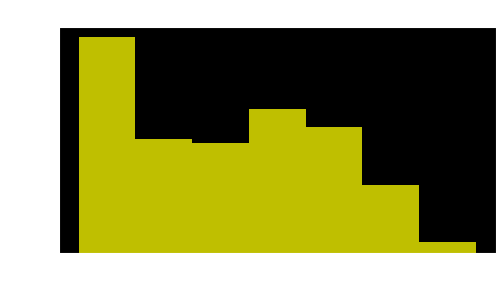
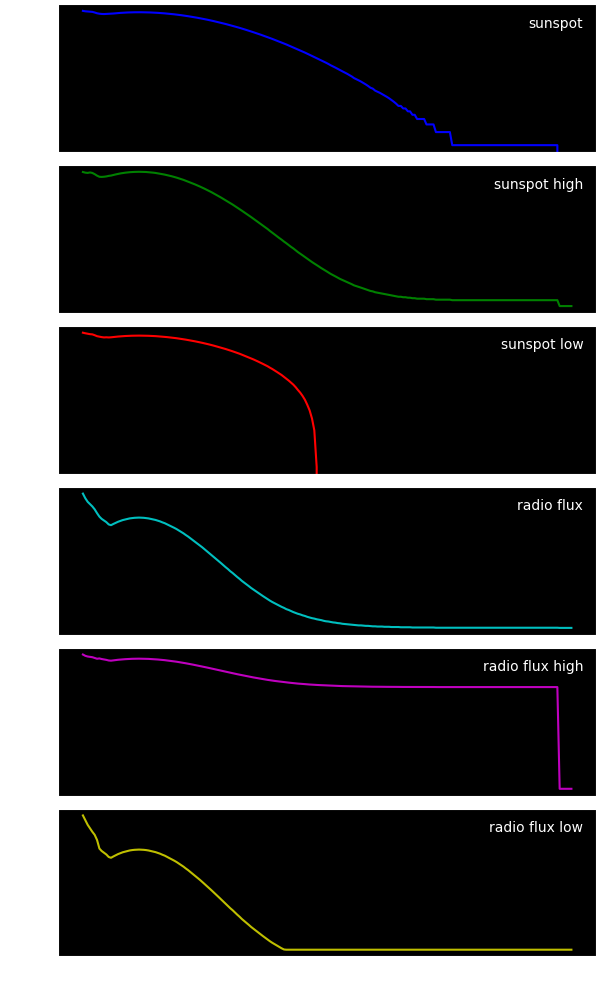
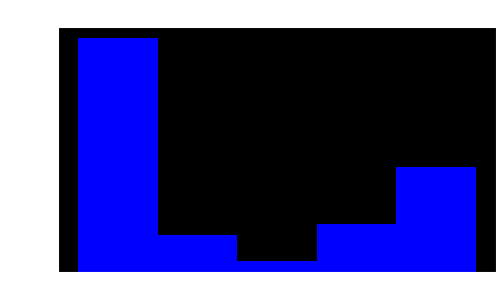

In [74]:
noaaPredict

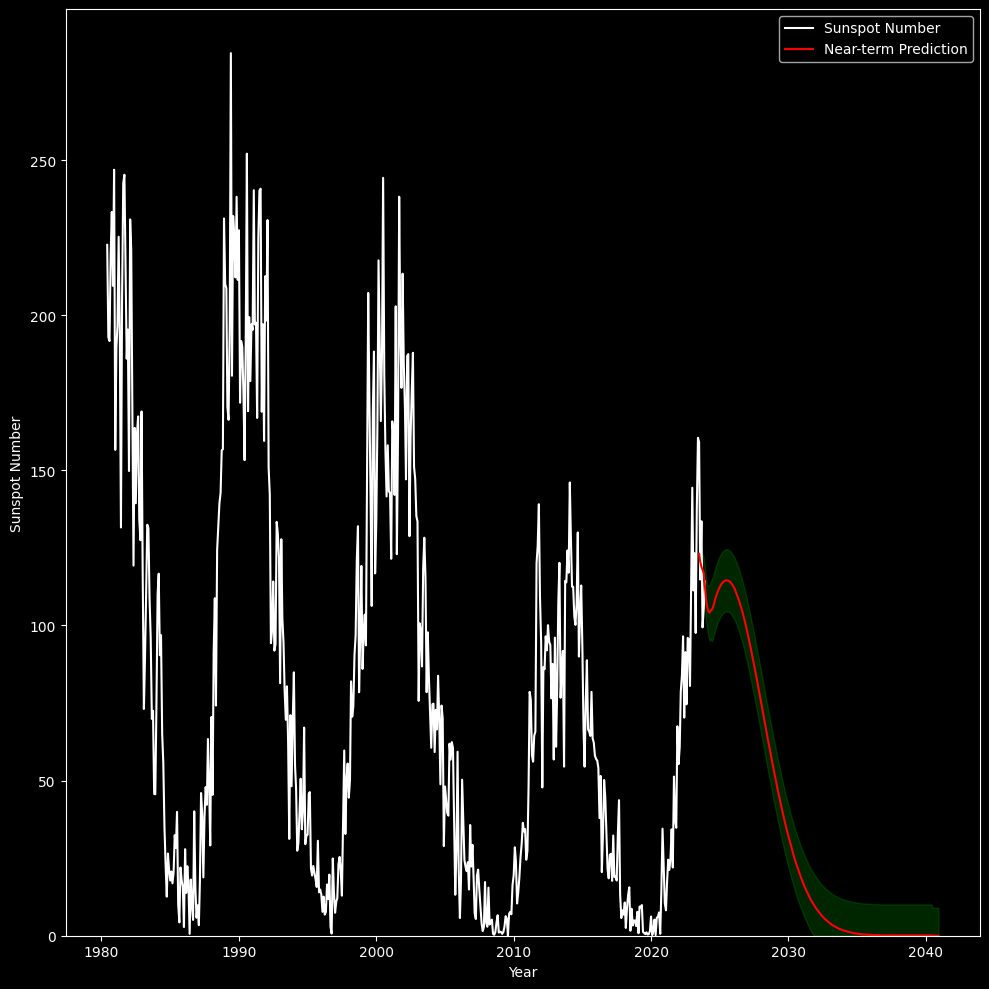

In [75]:
figure,axs = plt.subplots(figsize=(10,10))
axs.plot(
    noaa.index,
    noaa.quantity("sunspot RI"),
    color="white",
    label="Sunspot Number"
)
axs.plot(
    noaaPredict.index,
    noaaPredict.quantity("sunspot"),
    color="red",
    label="Near-term Prediction"
)
axs.fill_between(
    noaaPredict.index,
    noaaPredict.quantity("sunspot low"),
    noaaPredict.quantity("sunspot high"),
    alpha=0.3,
    color="green"
)
axs.set_ylim(bottom=0)
axs.set_ylabel("Sunspot Number")
axs.set_xlabel("Year")
axs.legend()
plt.tight_layout()
plt.show()